In [453]:
mkdir "C:\Users\Gaurav\Desktop\My Folder\Deep Sea Analytics"

A subdirectory or file C:\Users\Gaurav\Desktop\My Folder\Deep Sea Analytics already exists.


In [454]:
import pandas as pd

#read the csv files
outcome = pd.read_csv("outcome_interview.csv")
fighter = pd.read_csv("fighter_interview.csv")
event = pd.read_csv("event_interview.csv")

In [455]:
#merge the event name with the outcome file
fighter_event = pd.merge(outcome,event,how='left',left_on = 'event_id', right_on = 'id')[['fighter1_id','fighter2_id','name']]
fighter_event.columns = ['fighter1_id','fighter2_id','event_name']

In [456]:
#merger fighter1 name and nationality
fighter1_name = pd.merge(fighter_event,fighter,how='left',left_on = 'fighter1_id', right_on = 'id')
fighter1_name.columns = ['fighter1_id','fighter2_id','event_name','id_1','fighter1_name','fighter1_nationality']

In [457]:
#merger fighter2 name and nationality
fighter2_name = pd.merge(fighter1_name,fighter,how='left',left_on = 'fighter2_id', right_on = 'id')
fighter2_name.columns = ['fighter1_id','fighter2_id','event_name','id_1','fighter1_name','fighter1_nationality','id_2','fighter2_name','fighter2_nationality']

#filter required columns
fighter_output = fighter2_name[['fighter1_name','fighter2_name','fighter1_nationality','fighter2_nationality','event_name']]

In [458]:
#export output in csv
fighter_output.to_csv('fighter_output.csv')

In [459]:
#count by each nationailty
countries_count1 = fighter_output.groupby(['fighter1_nationality'], as_index = False).count()
countries_count1 = countries_count1[['fighter1_nationality','event_name']]
countries_count1.columns = ['Country_name','Count']

countries_count2 = fighter_output.groupby(['fighter2_nationality'], as_index = False).count()
countries_count2 = countries_count2[['fighter2_nationality','event_name']]
countries_count2.columns = ['Country_name','Count']

In [460]:
#get the list of countries and the count of fighters of each country
countries_count = countries_count1.append(countries_count2)
countries_count['Country_name'] = [str(i).lower() for i in countries_count['Country_name']] 
countries_count = countries_count.groupby(['Country_name'], as_index = False).sum()
x = countries_count.index[countries_count.Country_name == 'usa']
countries_count.loc[x,'Country_name'] = 'united states'
countries_count = countries_count.groupby(['Country_name'], as_index = False).sum()

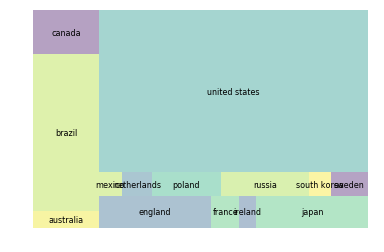

In [461]:
#filtering countries with count>100 and creating a treemap
countries_count = countries_count[countries_count['Count']>100]
import squarify
import matplotlib.pyplot as plt
squarify.plot(sizes=countries_count['Count'], label=countries_count['Country_name'], alpha= 0.4, text_kwargs={'fontsize':8})
plt.axis('off')
plt.show()